In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/train.csv", index_col=0)
df

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
62479,62479,46826964,White,Male,[80-90),?,3.0,1.0,1,2,...,A-,16.0,False,NONE,None,No,No,No,No,No
4543,4543,57647952,Caucasian,Male,[40-50),?,6.0,25.0,17,4,...,O+,14.2,False,>200,None,No,Yes,No,Yes,No
61307,61307,73513008,European,Female,[30-40),?,2.0,1.0,7,2,...,O+,12.7,False,None,None,No,Yes,No,Yes,No
43014,43014,204181182,Caucasian,Female,[40-50),?,1.0,6.0,7,3,...,O+,12.3,False,None,None,No,Yes,Ch,Yes,Yes
64051,64051,47947464,AfricanAmerican,Male,[70-80),?,1.0,11.0,5,6,...,O+,13.5,False,None,None,No,Yes,Ch,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55397,55397,125169948,Caucasian,Male,[50-60),?,5.0,1.0,1,3,...,AB+,15.2,False,NONE,None,No,No,No,No,No
74481,74481,46468368,Black,Female,[60-70),?,1.0,6.0,7,7,...,A-,13.3,False,None,None,No,Yes,Ch,Yes,No
46182,46182,196276608,AfricanAmerican,Female,[60-70),?,2.0,6.0,4,8,...,O+,13.7,True,None,None,No,Yes,No,Yes,No
77592,77592,149913090,Caucasian,Male,[50-60),?,1.0,6.0,7,3,...,B+,14.5,False,None,None,No,No,No,No,No


In [3]:
def clean(df):
    df_clean = df.copy()
    df_clean['race'] = df_clean['race'].replace(['AFRICANAMERICAN', 'Afro American', 'African American'], 'AfricanAmerican')
    df_clean['race'] = df_clean['race'].replace(['euro', 'EURO'], 'European')
    df_clean['race'] = df_clean['race'].replace(['WHITE', 'White'], 'Caucasian')
    df_clean['race'] = df_clean['race'].replace(['?'], 'Other')
    
    df_clean['max_glu_serum'] = df_clean['max_glu_serum'].replace(['NONE'], 'None')
    df_clean['max_glu_serum'] = df_clean['max_glu_serum'].replace(['NORM'], 'Norm')
    
    df_clean['change'] = df_clean['change'].replace(['ch'], 'Yes')
    
    df_clean['weight'] = df_clean['weight'].fillna('?')
    
    df_clean['age'] = df_clean['age'].fillna('?')
    
    return df_clean

df_clean = clean(df)
df_clean.head()

,admission_id,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
62479,62479,46826964,Caucasian,Male,[80-90),?,3.0,1.0,1,2,...,A-,16.0,False,None,None,No,No,No,No,No
4543,4543,57647952,Caucasian,Male,[40-50),?,6.0,25.0,17,4,...,O+,14.2,False,>200,None,No,Yes,No,Yes,No
61307,61307,73513008,European,Female,[30-40),?,2.0,1.0,7,2,...,O+,12.7,False,None,None,No,Yes,No,Yes,No
43014,43014,204181182,Caucasian,Female,[40-50),?,1.0,6.0,7,3,...,O+,12.3,False,None,None,No,Yes,Ch,Yes,Yes
64051,64051,47947464,AfricanAmerican,Male,[70-80),?,1.0,11.0,5,6,...,O+,13.5,False,None,None,No,Yes,Ch,Yes,No


In [4]:
df_clean.race.unique()

array(['Caucasian', 'European', 'AfricanAmerican', 'Other', 'Asian',
       'Black', 'Hispanic', 'Latino'], dtype=object)

In [5]:
def another_clean(df):
    return df.drop("admission_id", axis=1)

df_clean = another_clean(df_clean)
df_clean.head()

,patient_id,race,gender,age,weight,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,payer_code,...,blood_type,hemoglobin_level,blood_transfusion,max_glu_serum,A1Cresult,diuretics,insulin,change,diabetesMed,readmitted
62479,46826964,Caucasian,Male,[80-90),?,3.0,1.0,1,2,?,...,A-,16.0,False,None,None,No,No,No,No,No
4543,57647952,Caucasian,Male,[40-50),?,6.0,25.0,17,4,?,...,O+,14.2,False,>200,None,No,Yes,No,Yes,No
61307,73513008,European,Female,[30-40),?,2.0,1.0,7,2,UN,...,O+,12.7,False,None,None,No,Yes,No,Yes,No
43014,204181182,Caucasian,Female,[40-50),?,1.0,6.0,7,3,MC,...,O+,12.3,False,None,None,No,Yes,Ch,Yes,Yes
64051,47947464,AfricanAmerican,Male,[70-80),?,1.0,11.0,5,6,MC,...,O+,13.5,False,None,None,No,Yes,Ch,Yes,No


In [6]:
numerical_features = ["admission_type_code", "discharge_disposition_code", "time_in_hospital",
                     "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient",
                     "number_emergency", "number_inpatient", "number_diagnoses", "hemoglobin_level",
                     ]

categorical_features = ["race", "gender", "age", "weight", "admission_source_code", "payer_code",
                        "medical_specialty", "has_prosthesis", "complete_vaccination_status", "blood_type",
                        "blood_transfusion", "max_glu_serum", "A1Cresult", "diuretics", "insulin", 
                        "change", "diabetesMed", "diag_1", "diag_2", "diag_3"]

In [7]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [8]:
from sklearn.model_selection import train_test_split

X, y = df_clean.drop("readmitted", axis=1), df_clean["readmitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(Cs=[0.02, 0.025], cv=5, class_weight=class_weights, random_state=42, 
                                        scoring='f1'))
])

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['admission_type_code',
                                                   'discharge_disposition_code',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'num

In [11]:
def verify_gender_rate(X_test, y_test, y_pred):
    X_female, X_male = X_test[X_test["gender"] == "Female"], X_test[X_test["gender"] == "Male"]
    y_true_female, y_true_male = y_test[X_test["gender"] == "Female"], y_test[X_test["gender"] == "Male"]
    y_pred_female, y_pred_male = y_pred[X_test["gender"] == "Female"], y_pred[X_test["gender"] == "Male"]
    
    rate_female = f1_score(y_true_female, y_pred_female, pos_label='Yes') 
    rate_male = f1_score(y_true_male, y_pred_male, pos_label='Yes')
    
    success = True if abs(rate_male - rate_female) <= 0.15 else False
    return (success, abs(rate_male - rate_female))

In [12]:
def verify_race_rate(X_test, y_test, y_pred):
    race_values = X_test["race"].unique()
    rates = []
    for i in range(len(race_values)):
        for j in range(i+1, len(race_values)):
            race_a, race_b = race_values[i], race_values[j]
    
            X_race_a, X_race_b = X_test[X_test["race"] == race_a], X_test[X_test["race"] == race_b]
            y_true_race_a, y_true_race_b = y_test[X_test["race"] == race_a], y_test[X_test["race"] == race_b]
            y_pred_race_a, y_pred_race_b = y_pred[X_test["race"] == race_a], y_pred[X_test["race"] == race_b]

            rate_race_a = f1_score(y_true_race_a, y_pred_race_a, pos_label='Yes') 
            rate_race_b = f1_score(y_true_race_b, y_pred_race_b, pos_label='Yes')
            rates_difference = abs(rate_race_a - rate_race_b)
            rates.append(abs(rate_race_a - rate_race_b))
    
    success = True if np.max(rates) <= 0.15 else False
    return (success, np.max(rates))

In [13]:
def get_final_metric(X_test, y_test, y_pred):
    gender_rate = verify_gender_rate(X_test, y_test, y_pred) 
    race_rate = verify_race_rate(X_test, y_test, y_pred) 
    
    f1_value = f1_score(y_test, y_pred, pos_label='Yes')
    return f1_value - (gender_rate[0] or race_rate[0]) * 0.1 * max(gender_rate[1], race_rate[1])

In [14]:
y_pred_proba = pipeline.predict_proba(X_test)[:,1]
scores = []
thresholds = []
for threshold in np.arange(0.4, 0.6, 0.005):
    y_pred_threshold = np.array(['Yes' if elem > threshold else 'No' for elem in y_pred_proba])
    scores.append(get_final_metric(X_test, y_test, y_pred_threshold))
    thresholds.append(threshold)
    
best_threshold = round(thresholds[np.argmax(scores)], 3)
print(best_threshold, np.max(scores)) # 0.214 -- LogisticRegression

0.535 0.21467861071821465


In [15]:
y_pred = np.array(['Yes' if elem > best_threshold else 'No' for elem in y_pred_proba])
print("gender rate:", verify_gender_rate(X_test, y_test, y_pred))
print("race rate:", verify_race_rate(X_test, y_test, y_pred))

print(f1_score(y_test, y_pred, pos_label='Yes'), get_final_metric(X_test, y_test, y_pred))

gender rate: (True, 0.037982857813784215)
race rate: (False, 0.31746031746031744)
0.2464246424642464 0.21467861071821465


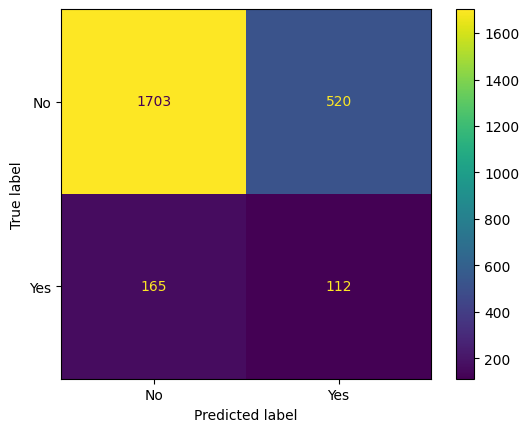

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline.classes_)
disp.plot()
plt.savefig("confusion_matrix.jpg", bbox_inches='tight')

In [17]:
np.sum([1 if elem == 'Yes' else 0 for elem in y_pred]) / len(y_pred) # 0.2532 -- LogisticRegression

0.2528

In [18]:
np.sum([1 if elem == 'Yes' else 0 for elem in y_test]) / len(y_test)

0.1108

In [19]:
np.sum([1 if elem == 'Yes' else 0 for elem in y_train]) / len(y_train)

0.10413333333333333